<center>

# **DSE 617: Data Science and Machine Learning**
# **Project 18**
## **Identification of Exoplanet Orbitals**

##### By

#### <font size="3">**Akanksha Singh(2311001)**</font>   


##### Instructor

#### <font size="3"> **Dr. Tanmay Basu** </font>
#####  <font size="2"> Assistant Professor, IISER Bhopal </font>

<br>

<img src="https://dse.iiserb.ac.in/img/IISERB_Logo.png" alt="drawing" width="100"/>
</center>

# **Importing the Data**

We will import the neccessary libraries, such as numpy for array calculations and functions, pandas for dataframe functoins, matplotlib for graphical plotting and imaging, and statistics for the median and mode calculation.

In [1]:
import numpy as np  # for array operations
import pandas as pd  # for dataframe operations
import matplotlib.pyplot as plt  # for plotting operations
import statistics as s  # for statitics functions
import sklearn
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV,TimeSeriesSplit
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error

We will create three dataframes here:

- `train_data`: Stores the data values for the exoplanet candidates
- `train_labels`: Stores the labels for the exoplanet's semi-major axis
- `test_data`: Storese the test database

In [2]:
train_data = pd.read_csv("exoplanet_trn_data.csv")
train_labels = pd.read_csv("exoplanet_trn_data_targets.csv",
                           header=None)
test_data = pd.read_csv("exoplanet_tst_data.csv")

/tmp/ipykernel_7028/212692028.py:1: DtypeWarning: Columns (20,33,34,81,82,106,107,153,154,155,170,172,204,280,281) have mixed types. Specify dtype option on import or set low_memory=False.
  train_data = pd.read_csv("exoplanet_trn_data.csv")


# **Data Processing**

The dataset contains data for various exoplanets, detected by the Kepler Exoplanet mission. The planets are "confirmed" exoplanet candidates

In [3]:
print("\nShape of the Training Data: ", train_data.shape)
print("Shape of the Test Data: ", test_data.shape, "\n")


Shape of the Training Data:  (17969, 288)
Shape of the Test Data:  (1997, 288) 



As we can observe, the data set contains a total of **17969** rows, which basically represent different exoplanets. Hence we have a total of 17969 candidates. Each of the exoplanet has a total of **288** features or parameteres which were recorded by the mission. These parameters are listed as columns. The test dataset contains **1997** number of samples and total of **288** features.

## Looking at our data

In [4]:
train_data["semi_major_axis"] = train_labels[1].values
train_data

,pl_name,hostname,pl_letter,hd_name,hip_name,tic_id,gaia_id,default_flag,sy_snum,sy_pnum,...,st_nspec,pl_nespec,pl_ntranspec,Unnamed: 282,Unnamed: 283,Unnamed: 284,Unnamed: 285,Unnamed: 286,Unnamed: 287,semi_major_axis
0,AU Mic c,AU Mic,c,HD 197481,HIP 102409,TIC 441420236,Gaia DR2 6794047652729201024,1,1,2,...,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.1101
1,Kepler-1476 b,Kepler-1476,b,NaN,NaN,TIC 164727404,Gaia DR2 2106597487787652352,0,1,1,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0932
2,Kepler-255 d,Kepler-255,d,NaN,NaN,TIC 272083669,Gaia DR2 2080202611655694336,0,1,3,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0202
3,Kepler-82 e,Kepler-82,e,NaN,NaN,TIC 63372898,Gaia DR2 2125850623586710400,0,1,5,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0632
4,K2-156 b,K2-156,b,NaN,NaN,TIC 176868262,Gaia DR2 3596250888028092160,1,1,1,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17964,Kepler-245 d,Kepler-245,d,NaN,NaN,TIC 63004906,Gaia DR2 2101768089124657664,0,1,4,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.1995
17965,Kepler-28 b,Kepler-28,b,NaN,NaN,TIC 63122956,Gaia DR2 2125731464014361088,1,1,2,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0620
17966,Kepler-1272 b,Kepler-1272,b,NaN,NaN,TIC 399794186,Gaia DR2 2100148611573075200,0,1,1,...,0,0,0,0.0,NaN,NaN,NaN,NaN,NaN,0.0000
17967,HD 102117 b,HD 102117,b,HD 102117,HIP 57291,TIC 267519701,Gaia DR2 5341673851394297600,0,1,1,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.1532


## Checking Missing Data

As we can see in the above dataset, a lot of columns present have a `NaN` values which poses issues to our machine learning algorithms. We decided to remove the columns that have more than half i.e. $50\%$ of their rows as missing. But according to this article from [PressBooks](https://pressbooks.library.upei.ca/montelpare/chapter/working-with-missing-data/) where it is advised to remove all the columns that have more than $05\%$ of their values missing, which is ten times less than our initial estimate, we decided to drop those columns which have more than $95\%$ and $90\%$ of the total rows as `NaN` or missing.

In [5]:
missing_values_count = train_data.isnull().sum()
missing_values_count = missing_values_count.sort_values(ascending=False)
columns_with_missingvalues_morethan_05per = missing_values_count.head(
    207).index.values

In [6]:
tr05 = train_data.drop(columns=columns_with_missingvalues_morethan_05per, axis = 1).copy()

In the above cell, we created a code to form list, `columns_with_missingvalues_morethan_05per`, which contains a list of columns that have more than $95\%$ of the total values missing.

In [7]:
print("\nShape of the Training Data: ", train_data.shape)
print("Shape of the Tr05 Dataset ", tr05.shape,"\n")
print("Shape of the Test Dataset ", test_data.shape, "\n")


Shape of the Training Data:  (17969, 289)
Shape of the Tr05 Dataset  (17969, 82) 

Shape of the Test Dataset  (1997, 288) 



## Finding wrongly classified columns 

There are certain columns in the below given array which should belong to the numerical stature but are assigned an object denomination, due to the presence of impure values in them. We locate and mark such column names, *manually* and relist them as numerical values.

In [8]:
category_columns = tr05.select_dtypes(include=['object']).columns.tolist()
print("Total number of Object Type Columns: ",
      tr05[category_columns].nunique().sort_values(ascending=False).size)

Total number of Object Type Columns:  37


In [9]:
print("\nThe total number of Unique Values in the Respective Columns is\n")
print(tr05[category_columns].nunique().sort_values(ascending=False))


The total number of Unique Values in the Respective Columns is

pl_orbper          10769
pl_orbpererr2       7912
pl_orbpererr1       7097
sy_pm               6015
elat                4908
glat                4898
glon                4897
dec                 4895
decstr              4820
ra                  4720
pl_name             4484
hostname            3379
rastr               3306
tic_id              3256
gaia_id             3229
pl_orbperlim        1909
st_tefflim           884
releasedate          323
pl_pubdate           292
disc_pubdate         283
pl_nnotes            122
st_nphot             104
disc_instrument       95
disc_telescope        85
pl_ntranspec          73
disc_facility         65
st_nrvc               55
disc_locale           46
pl_nespec             39
st_nspec              24
rv_flag               19
discoverymethod       11
ttv_flag              11
pl_controv_flag       11
pul_flag               8
soltype                7
pl_letter              7
dtype: int

Now, we will use out domain expertise or field knowledge to find such columns that are definitely belonging to the numerical status.

In [10]:
wrong_classified_columns = [
    "pl_orbper", "pl_orbpererr1", "pl_orbpererr2", "sy_pm", "elat", "glat",
    "glon", "pl_orbperlim", "st_tefflim", "pl_ntranspec", "st_nspec"
]

Removing the above identified columns from the `Category Columns` so that we don't wrongly classify the needed columns as numeric into 'Object Domain'.

In [11]:
category_columns = list(set(category_columns) - set(wrong_classified_columns))
print("\nThe final list of Categorical Columns: \n")
category_columns


The final list of Categorical Columns: 



['decstr',
 'disc_telescope',
 'pl_letter',
 'soltype',
 'pl_nnotes',
 'st_nrvc',
 'pl_pubdate',
 'disc_instrument',
 'dec',
 'hostname',
 'disc_pubdate',
 'disc_locale',
 'discoverymethod',
 'disc_facility',
 'pl_nespec',
 'rv_flag',
 'tic_id',
 'gaia_id',
 'pul_flag',
 'pl_controv_flag',
 'ttv_flag',
 'pl_name',
 'ra',
 'releasedate',
 'st_nphot',
 'rastr']

## Converting Categorical Data to Numbers for Regression

Now we will convert the 'Categorical Data' to Numerical values to run our regression models.

In [12]:
for i in category_columns:
    tr05[i] = pd.Categorical(tr05[i])
    tr05[i] = tr05[i].cat.codes

**The Category Columns in the test and the train data are to be the same which can be seen below**

In [13]:
tr05[category_columns]

,decstr,disc_telescope,pl_letter,soltype,pl_nnotes,st_nrvc,pl_pubdate,disc_instrument,dec,hostname,...,tic_id,gaia_id,pul_flag,pl_controv_flag,ttv_flag,pl_name,ra,releasedate,st_nphot,rastr
0,3002,0,1,6,7,0,278,81,1826,32,...,2869,3169,2,0,4,43,4299,303,1,3148
1,1354,11,0,3,1,0,176,56,3691,1610,...,1049,1341,2,0,4,2039,2464,71,0,1325
2,1686,11,2,2,1,0,164,56,4023,2212,...,1890,713,2,0,4,2850,3907,37,0,2763
3,1183,11,3,1,1,0,163,56,3519,2820,...,3130,1464,2,0,5,3832,3494,35,0,2352
4,2596,11,0,6,0,0,226,56,2070,851,...,1200,2438,2,0,4,1091,396,196,0,682
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17964,1090,11,2,2,1,0,164,56,3426,2201,...,3063,1045,0,0,5,2819,3314,37,0,2172
17965,1088,11,0,6,1,0,124,56,3424,2239,...,3088,1454,0,0,5,2917,3386,17,0,2244
17966,3622,11,0,6,77,0,241,56,87,1385,...,2677,920,0,0,6,1769,682,220,1,3305
17967,3205,41,0,6,7,48,59,46,2056,317,...,1602,2838,0,0,4,393,349,17,1,644


## Filling the Missing Data

As we can observe that there are a lot of `NaN` values in the columns, we will replace these values with the median of the data as it tends to be a more appropriate choice here, because the range of data is huge, and the extremeties are separated by a large gap.

In [14]:
def MedianCalculator(colname):
    pl_orbper = np.array(tr05[colname])
    pl_orbper = pl_orbper[np.logical_not(pd.isnull(pl_orbper))]
    m = []
    alpha = []
    for i in range(len(pl_orbper)):
        try:
            pl_orbper[i] = float(pl_orbper[i])
            m.append(pl_orbper[i])
        except:
            alpha.append(i)
    med = np.median(m)
    return med

for i in tr05.columns:
    if(i not in category_columns):
        tr05[i] = tr05[i].fillna(MedianCalculator(i))
    else:
        tr05[i] = tr05[i].fillna(s.mode(i))

In [15]:
#Checking if all the columns are free from the NaN values.
print("\nThe total number of NaN values in each column is: \n")
print(tr05.isnull().sum())


The total number of NaN values in each column is: 

pl_name            0
hostname           0
pl_letter          0
tic_id             0
gaia_id            0
                  ..
st_nrvc            0
st_nspec           0
pl_nespec          0
pl_ntranspec       0
semi_major_axis    0
Length: 82, dtype: int64


## Removing the non-numeric values in Columns with expected numeric values

As we can observe in the dataset, we can observe that there are certain non-numerical values in the dataset columns presetn, these are useless and will tend to produce errors while running our models. Hence, we will remove such columns.

In [16]:
def StringRowRemover(colname):
    arr = np.array(tr05[colname])
    alpha = []
    for i in range(len(arr)):
        try:
            arr[i] = float(arr[i])
        except:
            alpha.append(i)

    return alpha


for i in wrong_classified_columns:
    indexes = StringRowRemover(i)
    tr05 = tr05.drop(indexes)
    tr05 = tr05.set_index(np.arange(0, tr05.shape[0]))

In [17]:
tr05

,pl_name,hostname,pl_letter,tic_id,gaia_id,default_flag,sy_snum,sy_pnum,sy_mnum,cb_flag,...,sy_tmagerr2,pl_pubdate,releasedate,pl_nnotes,st_nphot,st_nrvc,st_nspec,pl_nespec,pl_ntranspec,semi_major_axis
0,43,32,1,2869,3169,1,1,2,0,0,...,-0.032000,278,303,7,1,0,1,13,0,0.1101
1,2039,1610,0,1049,1341,0,1,1,0,0,...,-0.006500,176,71,1,0,0,0,13,0,0.0932
2,2850,2212,2,1890,713,0,1,3,0,0,...,-0.007900,164,37,1,0,0,0,13,0,0.0202
3,3832,2820,3,3130,1464,0,1,5,0,0,...,-0.008800,163,35,1,0,0,0,13,0,0.0632
4,1091,851,0,1200,2438,1,1,1,0,0,...,-0.006100,226,196,0,0,0,0,13,0,0.0149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15771,1914,1503,1,896,1066,0,1,3,0,0,...,-0.007287,176,71,7,0,0,0,13,2,0.0905
15772,2819,2201,2,3063,1045,0,1,4,0,0,...,-0.007800,164,37,1,0,0,0,13,0,0.1995
15773,2917,2239,0,3088,1454,1,1,2,0,0,...,-0.006200,124,17,1,0,0,0,13,0,0.0620
15774,393,317,0,1602,2838,0,1,1,0,0,...,-0.006000,59,17,7,1,48,0,13,0,0.1532


### Finding the Correlation between Semi-Major Axis and the Variables

In [18]:
tr05.corr()["semi_major_axis"].sort_values()

pl_orbpererr2     -0.792814
discoverymethod   -0.175152
tran_flag         -0.074321
elat              -0.058175
disc_locale       -0.053225
                     ...   
ima_flag           0.392637
pl_orbpererr1      0.792743
pl_orbper          0.792995
semi_major_axis    1.000000
sy_mnum                 NaN
Name: semi_major_axis, Length: 82, dtype: float64

We are removing the column `sy_mnum` because it is giving `NaN` correlation with target variable `semi_major_axis`.

This shows that `sy_mnum` has only one constant value and hence irrelevant for our purpose.

In [19]:
tr05 = tr05.drop(columns = ["sy_mnum"], axis =1)

Checking the correlation again after removing the `sy_mnum` variable.

In [20]:
tr05.corr()["semi_major_axis"].sort_values()

pl_orbpererr2     -0.792814
discoverymethod   -0.175152
tran_flag         -0.074321
elat              -0.058175
disc_locale       -0.053225
                     ...   
glon               0.068646
ima_flag           0.392637
pl_orbpererr1      0.792743
pl_orbper          0.792995
semi_major_axis    1.000000
Name: semi_major_axis, Length: 81, dtype: float64

## C-Map of the Dataset

In [21]:
tr05.corr().style.background_gradient(cmap='coolwarm')

In [22]:
tr05.corr().semi_major_axis

pl_name           -0.021931
hostname          -0.023302
pl_letter         -0.009631
tic_id             0.023881
gaia_id            0.032816
                     ...   
st_nrvc           -0.003002
st_nspec           0.000530
pl_nespec         -0.009203
pl_ntranspec      -0.002391
semi_major_axis    1.000000
Name: semi_major_axis, Length: 81, dtype: float64

In [23]:
tr05.shape

(15776, 81)

As we can see above, for the target variable, i.e. The Semi-Major axis, the system calculates the Correlation with a total of 70 columns, whereas we can see that the total dataset contains about 81 columns including the Semi-Major axis. Hence there are some of the columns which are not being considered for Coorelation calculation.

It was discovered that the Correlation is NOT calculated for the Object Type and Categorical Columns in the Pandas dataframe. This arised an issue, as we converte some of the columns, few of which were crucial (by domain knowledge) were converted into Object types. Hence this discripancy occured in the number of columns and total number of Correlations calculated.

## Conversion of Object Data types into float

As discussed above, we will now convert the Object type data classes again into float.

In [24]:
for i in wrong_classified_columns:
    tr05[i] = tr05[i].astype("float")

In [25]:
tr05.corr().semi_major_axis.sort_values()

pl_orbpererr2     -0.792814
discoverymethod   -0.175152
tran_flag         -0.074321
elat              -0.058175
disc_locale       -0.053225
                     ...   
glon               0.068646
ima_flag           0.392637
pl_orbpererr1      0.792743
pl_orbper          0.792995
semi_major_axis    1.000000
Name: semi_major_axis, Length: 81, dtype: float64

This brings out a wonderful result, as we thought, the Orbital Period, or the `pl_orbper` should have a high correlation with the Dataset, and it actually shows up to have a value of 0.79 which is pretty reasonable.

## C-Map of the Dataset after Column Conversions

In [26]:
tr05.corr().style.background_gradient(cmap='coolwarm')

# Removing the Outliers

Several Columns in the dataset tend to contain contrasting data values, ranging from Mico range to Mega. Such difference in the dataset in way more than the acceptable range of the standard variance. Hence we removed the outliers in a hope to increase the correlation.

In [27]:
tr05[["pl_orbper", "semi_major_axis"]].describe()

,pl_orbper,semi_major_axis
count,1.577600e+04,15776.000000
mean,2.617040e+04,2.164164
std,3.201208e+06,75.368856
min,9.070629e-02,0.004400
25%,4.901447e+00,0.054200
50%,1.146347e+01,0.098800
75%,2.991414e+01,0.200100
max,4.020000e+08,7506.000000


In [28]:
non_category_columns = list(set(tr05.columns) - set(category_columns))
tr05_out = tr05.copy()

In [29]:
from scipy import stats

z_scores = stats.zscore(
    tr05_out[non_category_columns]
)  # Calculating the z_scores for each value in datafram
z_scores = np.abs(z_scores)  # taking only absolute value of z_score
filtered_entries = (z_scores < 10).all(
    axis=1)  # taking threshold to be |z_score| < 20
tr05_out = tr05_out[
    filtered_entries]  # considering only those entries where we dont have any outlier
tr05_out

,pl_name,hostname,pl_letter,tic_id,gaia_id,default_flag,sy_snum,sy_pnum,cb_flag,discoverymethod,...,sy_tmagerr2,pl_pubdate,releasedate,pl_nnotes,st_nphot,st_nrvc,st_nspec,pl_nespec,pl_ntranspec,semi_major_axis
0,43,32,1,2869,3169,1,1,2,0,9,...,-0.032000,278,303,7,1,0,1.0,13,0.0,0.1101
1,2039,1610,0,1049,1341,0,1,1,0,9,...,-0.006500,176,71,1,0,0,0.0,13,0.0,0.0932
2,2850,2212,2,1890,713,0,1,3,0,9,...,-0.007900,164,37,1,0,0,0.0,13,0.0,0.0202
3,3832,2820,3,3130,1464,0,1,5,0,9,...,-0.008800,163,35,1,0,0,0.0,13,0.0,0.0632
4,1091,851,0,1200,2438,1,1,1,0,9,...,-0.006100,226,196,0,0,0,0.0,13,0.0,0.0149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15771,1914,1503,1,896,1066,0,1,3,0,9,...,-0.007287,176,71,7,0,0,0.0,13,2.0,0.0905
15772,2819,2201,2,3063,1045,0,1,4,0,9,...,-0.007800,164,37,1,0,0,0.0,13,0.0,0.1995
15773,2917,2239,0,3088,1454,1,1,2,0,9,...,-0.006200,124,17,1,0,0,0.0,13,0.0,0.0620
15774,393,317,0,1602,2838,0,1,1,0,8,...,-0.006000,59,17,7,1,48,0.0,13,0.0,0.1532


Since we are not sure about the outcome of this operation, we form a new dataset called `t05_out`.

In [30]:
tr05_out[["pl_orbper", "semi_major_axis"]].describe()

,pl_orbper,semi_major_axis
count,15377.000000,15377.000000
mean,114.698792,0.294999
std,823.208543,0.826415
min,0.240104,0.005800
25%,4.897134,0.054200
50%,11.463474,0.097700
75%,29.221510,0.193100
max,43000.000000,25.000000


As we can see now, that the `std` is about six times the value of `mean` contrary to the previous, 150 times.

In [31]:
tr05_out

,pl_name,hostname,pl_letter,tic_id,gaia_id,default_flag,sy_snum,sy_pnum,cb_flag,discoverymethod,...,sy_tmagerr2,pl_pubdate,releasedate,pl_nnotes,st_nphot,st_nrvc,st_nspec,pl_nespec,pl_ntranspec,semi_major_axis
0,43,32,1,2869,3169,1,1,2,0,9,...,-0.032000,278,303,7,1,0,1.0,13,0.0,0.1101
1,2039,1610,0,1049,1341,0,1,1,0,9,...,-0.006500,176,71,1,0,0,0.0,13,0.0,0.0932
2,2850,2212,2,1890,713,0,1,3,0,9,...,-0.007900,164,37,1,0,0,0.0,13,0.0,0.0202
3,3832,2820,3,3130,1464,0,1,5,0,9,...,-0.008800,163,35,1,0,0,0.0,13,0.0,0.0632
4,1091,851,0,1200,2438,1,1,1,0,9,...,-0.006100,226,196,0,0,0,0.0,13,0.0,0.0149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15771,1914,1503,1,896,1066,0,1,3,0,9,...,-0.007287,176,71,7,0,0,0.0,13,2.0,0.0905
15772,2819,2201,2,3063,1045,0,1,4,0,9,...,-0.007800,164,37,1,0,0,0.0,13,0.0,0.1995
15773,2917,2239,0,3088,1454,1,1,2,0,9,...,-0.006200,124,17,1,0,0,0.0,13,0.0,0.0620
15774,393,317,0,1602,2838,0,1,1,0,8,...,-0.006000,59,17,7,1,48,0.0,13,0.0,0.1532


Some of the values in few columns were removed as a result of the above operation, hence leading to `NaN` as their Correlation with the `Semi-Major Axis`. To deal with this, we removed the columns that gave a `NaN` correlation with the Semi-Major axis after the Outlier removal.

In [32]:
tr05_out.corr().semi_major_axis.sort_values().tail(20)

sy_disterr1        0.214471
releasedate        0.218823
st_nspec           0.231739
glon               0.237599
soltype            0.238388
disc_facility      0.242979
rv_flag            0.279366
disc_telescope     0.296783
micro_flag         0.304490
pl_orbpererr1      0.506324
pl_orbper          0.830892
semi_major_axis    1.000000
cb_flag                 NaN
ptv_flag                NaN
ast_flag                NaN
etv_flag                NaN
ima_flag                NaN
dkin_flag               NaN
pl_orbperlim            NaN
st_tefflim              NaN
Name: semi_major_axis, dtype: float64

#### Removing the constant columns

This is the list of column that became `NaN` after removal of the outliers.

In [33]:
const_col = [
    'cb_flag', 'ptv_flag', 'ast_flag', 'etv_flag', 'ima_flag', 'dkin_flag',
    'pl_orbperlim', 'st_tefflim'
]
tr05_out = tr05_out.drop(columns=const_col, axis=1)

In [34]:
print("\nWITH OUTLIERS REMOVED\n\n",
      tr05_out.corr().semi_major_axis.sort_values().tail(20), "\n\n\n")
print("WITHOUT OUTLIERS REMOVED\n\n",
      tr05.corr().semi_major_axis.sort_values().tail(20))


WITH OUTLIERS REMOVED

 sy_vmagerr2        0.110916
pl_nnotes          0.118277
decstr             0.134863
sy_jmagerr1        0.173693
st_nrvc            0.174171
sy_hmagerr1        0.176934
default_flag       0.187995
sy_pm              0.199261
sy_disterr1        0.214471
releasedate        0.218823
st_nspec           0.231739
glon               0.237599
soltype            0.238388
disc_facility      0.242979
rv_flag            0.279366
disc_telescope     0.296783
micro_flag         0.304490
pl_orbpererr1      0.506324
pl_orbper          0.830892
semi_major_axis    1.000000
Name: semi_major_axis, dtype: float64 



WITHOUT OUTLIERS REMOVED

 dkin_flag          0.013505
pl_nnotes          0.017089
ast_flag           0.018554
disc_instrument    0.019104
pl_pubdate         0.022977
tic_id             0.023881
sy_gaiamagerr1     0.023932
decstr             0.026501
disc_facility      0.030787
gaia_id            0.032816
soltype            0.033198
releasedate        0.041698
cb_flag   

In [35]:
tr05_out.corr().style.background_gradient(cmap='coolwarm')

,pl_name,hostname,pl_letter,tic_id,gaia_id,default_flag,sy_snum,sy_pnum,discoverymethod,disc_year,disc_pubdate,disc_locale,disc_facility,disc_telescope,disc_instrument,rv_flag,pul_flag,tran_flag,obm_flag,micro_flag,soltype,pl_controv_flag,pl_orbper,pl_orbpererr1,pl_orbpererr2,ttv_flag,rastr,ra,decstr,dec,glat,glon,elat,elon,sy_pm,sy_pmerr1,sy_pmerr2,sy_pmra,sy_pmraerr1,sy_pmraerr2,sy_pmdec,sy_pmdecerr1,sy_pmdecerr2,sy_dist,sy_disterr1,sy_bmag,sy_bmagerr1,sy_bmagerr2,sy_vmag,sy_vmagerr1,sy_vmagerr2,sy_jmag,sy_jmagerr1,sy_jmagerr2,sy_hmag,sy_hmagerr1,sy_hmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamagerr1,sy_gaiamagerr2,sy_tmagerr1,sy_tmagerr2,pl_pubdate,releasedate,pl_nnotes,st_nphot,st_nrvc,st_nspec,pl_nespec,pl_ntranspec,semi_major_axis
pl_name,1.000000,0.995078,0.042808,-0.160802,-0.311651,-0.191163,-0.086805,0.045571,0.105179,0.221943,0.189128,0.374917,0.040378,-0.288002,0.369498,-0.394393,0.010090,0.428392,0.037681,0.129836,-0.256823,-0.009666,-0.178282,-0.037423,0.051746,0.093795,0.261030,0.197657,-0.038861,0.230790,0.045913,-0.299772,0.346270,0.376019,-0.333479,0.042018,-0.042339,0.015324,0.039085,-0.039581,0.163937,0.045740,-0.046260,0.266195,0.131816,0.449314,0.047955,-0.043652,0.466876,0.147259,-0.145791,0.489582,-0.179514,0.180123,0.492260,-0.149630,0.158946,0.492465,-0.037006,0.034164,-0.051934,0.053712,0.027270,-0.025922,-0.015902,-0.189763,0.002438,0.023828,-0.233188,-0.324447,0.019115,-0.014930,-0.220238
hostname,0.995078,1.000000,0.047809,-0.166854,-0.322290,-0.198867,-0.093206,0.051824,0.113021,0.244773,0.212202,0.392710,0.037570,-0.301018,0.381289,-0.416187,0.011677,0.445932,0.032496,0.129506,-0.269654,-0.009860,-0.185663,-0.040175,0.054953,0.092310,0.271072,0.204700,-0.043654,0.240648,0.049510,-0.312487,0.362210,0.391243,-0.348573,0.040354,-0.040703,0.014510,0.037297,-0.037819,0.172663,0.044183,-0.044729,0.271521,0.132831,0.468690,0.050014,-0.045763,0.486787,0.152064,-0.150584,0.510441,-0.185570,0.186178,0.512931,-0.155132,0.164638,0.513161,-0.037506,0.034666,-0.052958,0.054715,0.026181,-0.024836,-0.017033,-0.199679,-0.001023,0.020845,-0.243610,-0.336105,0.019585,-0.016949,-0.230264
pl_letter,0.042808,0.047809,1.000000,-0.017694,-0.033056,0.058245,0.038585,0.703878,0.074613,-0.074200,-0.101748,0.110158,-0.049223,-0.060903,0.031806,-0.041789,-0.014993,0.058086,-0.051400,-0.057286,0.003412,0.106311,0.008071,0.003891,-0.005343,0.210896,0.042539,0.042556,-0.018569,0.040443,0.004357,-0.037794,0.063264,0.069188,0.020627,0.003767,-0.004055,-0.003665,0.003365,-0.003558,-0.029746,0.003658,-0.003861,-0.071783,-0.065330,0.051321,0.042511,-0.043828,0.037499,0.062259,-0.062584,0.024478,-0.026818,0.026522,0.020560,-0.032613,0.032664,0.020180,-0.035524,0.034179,-0.007846,0.007159,0.001767,-0.002310,-0.008798,-0.050883,0.046975,-0.047617,-0.041097,-0.000904,-0.033814,-0.028196,-0.001583
tic_id,-0.160802,-0.166854,-0.017694,1.000000,0.350035,0.099294,0.055750,-0.024221,0.108988,-0.091939,-0.084532,-0.118316,0.054924,0.140052,-0.029377,0.187266,-0.004226,-0.071920,0.011525,-0.190608,0.117208,0.011946,0.059678,0.021449,-0.025789,-0.013214,0.062888,0.040846,0.313503,0.195029,-0.030100,0.202766,-0.124290,-0.137917,0.105093,-0.030429,0.029533,-0.012861,-0.027490,0.026896,-0.080694,-0.032032,0.031414,-0.201424,-0.173263,-0.146120,-0.019861,0.013379,-0.160395,-0.026106,0.024328,-0.174176,0.067405,-0.068267,-0.178454,0.066358,-0.072819,-0.177502,0.047489,-0.044341,0.012595,-0.015049,-0.026118,0.024160,0.020249,0.079713,-0.006842,0.017809,0.108103,0.081309,0.000212,0.042596,0.018186
gaia_id,-0.311651,-0.322290,-0.033056,0.350035,1.000000,0.255027,0.077598,-0.026987,0.017870,-0.217267,-0.195919,-0.356191,0.177861,0.280569,-0.014321,0.432317,-0.017081,-0.276621,0.017038,-0.197516,0.307979,0.013185,0.113389,0.012859,-0.023764,-0.071664,-0.505555,-0.391770,0.477634,-0.069992,-0.094304,0.526389,-0.490182,-0.417851,0.301509,-0.077428,0.076484,-0.047590,-0.073023,0.072409,-0.165748,-0.080604,0.079974,-0.330228,-0.211707,-0.364821,-0.01591

# Test Data Cleaning

In [36]:
total_columns = test_data.columns
columns_to_keep = tr05_out.columns
columns_to_remove = list(set(total_columns)-set(columns_to_keep))

for i in columns_to_remove:
        test_data = test_data.drop(columns=i,axis=1)

In [37]:
for i in category_columns:
    test_data[i] = pd.Categorical(test_data[i])
    test_data[i] = test_data[i].cat.codes

In [38]:
def MedianCalculator1(colname):
    pl_orbper = np.array(test_data[colname])
    pl_orbper = pl_orbper[np.logical_not(pd.isnull(pl_orbper))]
    m = []
    alpha = []
    for i in range(len(pl_orbper)):
        try:
            pl_orbper[i] = float(pl_orbper[i])
            m.append(pl_orbper[i])
        except:
            alpha.append(i)
    med = np.median(m)
    return med

        
for i in test_data.columns:
    if(i not in category_columns):
        test_data[i] = test_data[i].fillna(MedianCalculator1(i))
    else:
        test_data[i] = test_data[i].fillna(s.mode(i))

In [39]:
print("\nThe total number of NaN values in each column of Test data is: \n")
print(test_data.isnull().sum())


The total number of NaN values in each column of Test data is: 

pl_name         0
hostname        0
pl_letter       0
tic_id          0
gaia_id         0
               ..
st_nphot        0
st_nrvc         0
st_nspec        0
pl_nespec       0
pl_ntranspec    0
Length: 72, dtype: int64


In [41]:
def StringRowRemover1(colname):
    arr = np.array(test_data[colname])
    alpha = []
    for i in range(len(arr)):
        try:
            arr[i] = float(arr[i])
        except:
            alpha.append(i)

    return alpha


for i in test_data.columns:
    indexes = StringRowRemover1(i)
    test_data = test_data.drop(indexes)
    test_data = test_data.set_index(np.arange(0, test_data.shape[0]))

In [42]:
c = 'sy_mnum'
if c in test_data.columns:
    test_data = test_data.drop(columns = ["sy_mnum"], axis =1)

In [43]:
for i in test_data.columns:
    test_data[i] = test_data[i].astype("float")

# Feature Engineering

![SNOWFALL](https://th.bing.com/th/id/R.efe39a3a75e1ce0a199a32cdc1689ece?rik=2T2R6lsG6yJLVA&riu=http%3a%2f%2fwww.sliderbase.com%2fimages%2freferats%2f1148b%2f(25).PNG&ehk=o6h3a1sXrFXA7GrCaYHoGA9gPIksASYcz1dLa2350vw%3d&risl=&pid=ImgRaw&r=0)

In [44]:
tr05_out["pl_orbper1"] = tr05_out["pl_orbper"]**(2 / 3)
tr05_out["pl_orbper2"] = (tr05_out["pl_orbper"]**(2 / 3)) * (6.67 * 10**-11)
test_data["pl_orbper1"] = test_data["pl_orbper"]**(2 / 3)
test_data["pl_orbper2"] = (test_data["pl_orbper"]**(2 / 3)) * (6.67 * 10**-11)
tr05_out.insert(
    len(tr05_out.columns) - 1, 'semi_major_axis',
    tr05_out.pop('semi_major_axis'))

In [45]:
tr05_out.corr().semi_major_axis.sort_values().tail(20), "\n\n\n"

(decstr             0.134863
 sy_jmagerr1        0.173693
 st_nrvc            0.174171
 sy_hmagerr1        0.176934
 default_flag       0.187995
 sy_pm              0.199261
 sy_disterr1        0.214471
 releasedate        0.218823
 st_nspec           0.231739
 glon               0.237599
 soltype            0.238388
 disc_facility      0.242979
 rv_flag            0.279366
 disc_telescope     0.296783
 micro_flag         0.304490
 pl_orbpererr1      0.506324
 pl_orbper          0.830892
 pl_orbper1         0.899004
 pl_orbper2         0.899004
 semi_major_axis    1.000000
 Name: semi_major_axis, dtype: float64,
 '\n\n\n')

In [46]:
tr05_out.to_csv('FinalData.csv', index = False)
test_data.to_csv('CleanedTestData.csv', index = False)

In [47]:

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

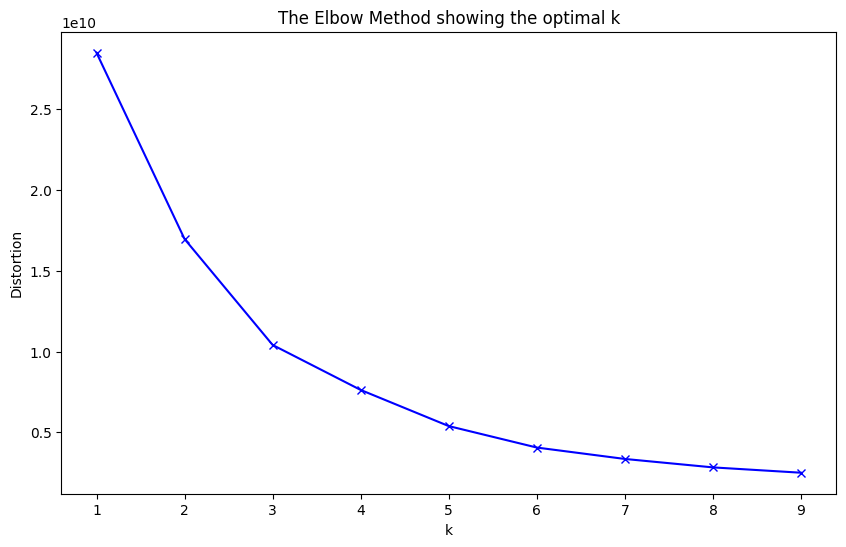

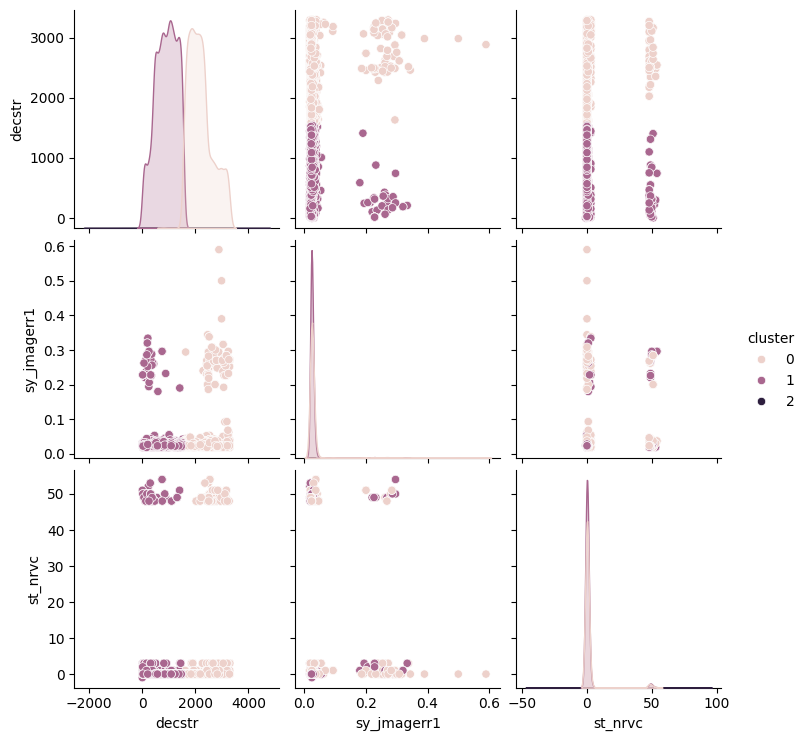

In [94]:
'''# Assuming 'tr05_out' is your DataFrame
features = ['decstr', 'sy_jmagerr1', 'st_nrvc', 'sy_hmagerr1', 'default_flag', 'sy_pm', 'sy_disterr1', 'releasedate', 
            'st_nspec', 'glon', 'soltype', 'disc_facility', 'rv_flag', 'disc_telescope', 'micro_flag', 'pl_orbpererr1',
            'pl_orbper', 'pl_orbper1', 'pl_orbper2']

# Select the relevant features
selected_features = tr05_out[features]

# Apply KMeans clustering without feature scaling
# Use the Elbow method to find the optimal number of clusters
distortions = []
K = range(1, 10)
for k in K:
    kmeanModel = KMeans(n_clusters=k, n_init=10)  # Explicitly set n_init to suppress the warning
    kmeanModel.fit(selected_features)
    distortions.append(kmeanModel.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(10, 6))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

# Based on the Elbow curve, choose the optimal number of clusters
optimal_k = 3  

# Apply KMeans clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, n_init=10)  # Explicitly set n_init to suppress the warning
# Use .loc to set values in the original DataFrame
tr05_out['cluster'] = kmeans.fit_predict(selected_features)

# Visualize the clusters if you want
# For example, a pairplot for the first three features
sns.pairplot(tr05_out[['decstr', 'sy_jmagerr1', 'st_nrvc', 'cluster']], hue='cluster', diag_kind='kde')'''
plt.show()


# Modelling 

In [48]:
from sklearn.model_selection import GridSearchCV  # Gridsearch for Parameter Tuning
from sklearn.pipeline import Pipeline  # Assembling steps to cross-validate together
from sklearn.metrics import mean_squared_error

In [49]:
tr_final = pd.read_csv('FinalData.csv')
tr_final.head()

,pl_name,hostname,pl_letter,tic_id,gaia_id,default_flag,sy_snum,sy_pnum,discoverymethod,disc_year,...,releasedate,pl_nnotes,st_nphot,st_nrvc,st_nspec,pl_nespec,pl_ntranspec,pl_orbper1,pl_orbper2,semi_major_axis
0,43,32,1,2869,3169,1,1,2,9,2021,...,303,7,1,0,1.0,13,0.0,7.085101,4.725763e-10,0.1101
1,2039,1610,0,1049,1341,0,1,1,9,2016,...,71,1,0,0,0.0,13,0.0,4.751911,3.169524e-10,0.0932
2,2850,2212,2,1890,713,0,1,3,9,2016,...,37,1,0,0,0.0,13,0.0,1.030188,6.871357e-11,0.0202
3,3832,2820,3,3130,1464,0,1,5,9,2014,...,35,1,0,0,0.0,13,0.0,3.265965,2.178399e-10,0.0632
4,1091,851,0,1200,2438,1,1,1,9,2018,...,196,0,0,0,0.0,13,0.0,0.871185,5.810802e-11,0.0149


In [50]:
final_columns = tr_final.columns
X = tr_final[[
    'pl_name', 'hostname', 'pl_letter', 'tic_id', 'gaia_id', 'default_flag',
    'sy_snum', 'sy_pnum', 'discoverymethod', 'disc_year', 'disc_pubdate',
    'disc_locale', 'disc_facility', 'disc_telescope', 'disc_instrument',
    'rv_flag', 'pul_flag', 'tran_flag', 'obm_flag', 'micro_flag', 'soltype',
    'pl_controv_flag', 'pl_orbper', 'pl_orbpererr1', 'pl_orbpererr2',
    'ttv_flag', 'rastr', 'ra', 'decstr', 'dec', 'glat', 'glon', 'elat', 'elon',
    'sy_pm', 'sy_pmerr1', 'sy_pmerr2', 'sy_pmra', 'sy_pmraerr1', 'sy_pmraerr2',
    'sy_pmdec', 'sy_pmdecerr1', 'sy_pmdecerr2', 'sy_dist', 'sy_disterr1',
    'sy_bmag', 'sy_bmagerr1', 'sy_bmagerr2', 'sy_vmag', 'sy_vmagerr1',
    'sy_vmagerr2', 'sy_jmag', 'sy_jmagerr1', 'sy_jmagerr2', 'sy_hmag',
    'sy_hmagerr1', 'sy_hmagerr2', 'sy_kmag', 'sy_kmagerr1', 'sy_kmagerr2',
    'sy_gaiamagerr1', 'sy_gaiamagerr2', 'sy_tmagerr1', 'sy_tmagerr2',
    'pl_pubdate', 'releasedate', 'pl_nnotes', 'st_nphot', 'st_nrvc',
    'st_nspec', 'pl_nespec', 'pl_ntranspec', 'pl_orbper1', 'pl_orbper2'
]].values
y = tr_final["semi_major_axis"].values

In [51]:
X.shape, y.shape

((15377, 74), (15377,))

### Linear Regression

In [52]:
from sklearn.linear_model import LinearRegression

In [52]:
'''
linear = LinearRegression()-
linear_parameters = {
    'fit_intercept': [True, False],    # Whether to calculate the intercept for this model 
    #'normalize': [True, False],        # Whether the regressors X will be normalized before regression or not
    'copy_X': [True, False]            # If True, X will be copied; else, it may be overwritten.
}
grid_linear = GridSearchCV(linear, linear_parameters, scoring='neg_mean_squared_error', cv=5)
grid_linear.fit(X, y)
linear = grid_linear.best_estimator_
print("\nThe best parameters found for Linear Regression are: \n",
      grid_linear.best_params_)
'''


'\nlinear = LinearRegression()-\nlinear_parameters = {\n    \'fit_intercept\': [True, False],    # Whether to calculate the intercept for this model \n    #\'normalize\': [True, False],        # Whether the regressors X will be normalized before regression or not\n    \'copy_X\': [True, False]            # If True, X will be copied; else, it may be overwritten.\n}\ngrid_linear = GridSearchCV(linear, linear_parameters, scoring=\'neg_mean_squared_error\', cv=5)\ngrid_linear.fit(X, y)\nlinear = grid_linear.best_estimator_\nprint("\nThe best parameters found for Linear Regression are: \n",\n      grid_linear.best_params_)\n'

In [53]:
'''
linear = LinearRegression()
linear_parameters = {
    
    'fit_intercept': [True, False],
    'copy_X': [True, False]
}
grid_linear = GridSearchCV(linear, linear_parameters, scoring='neg_mean_squared_error', cv=5)
grid_linear.fit(X, y)
linear = grid_linear.best_estimator_
print("\nThe best parameters found for Linear Regression are:\n", grid_linear.best_params_)

# Linear Regression with different values of k for K-Fold
k_values = range(2, 11)
results = []

for k in k_values:
    kfold = KFold(n_splits=k, shuffle=True, random_state=42)
    
    # Initialize Grid Search with Linear Regression model
    grid_search = GridSearchCV(linear, linear_parameters, cv=kfold, scoring='neg_mean_squared_error')
    
    # Fit the model to the data
    grid_search.fit(X, y)
    
    # Get the best parameters and best model
    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_
    
    # Make predictions on the training set
    predictions = best_model.predict(X)
    
    # Evaluate the model
    mse = mean_squared_error(y, predictions)
    
    # Store results
    results.append({
        'k_value': k,
        'best_params': best_params,
        'best_model': best_model,
        'mse': mse
    })

# Display results
for result in results:
    print(f"\nResults for k={result['k_value']}:")
    print(f"Best Parameters: {result['best_params']}")
    print(f"Mean Squared Error: {result['mse']:.4f}")'''

'\nlinear = LinearRegression()\nlinear_parameters = {\n    \n    \'fit_intercept\': [True, False],\n    \'copy_X\': [True, False]\n}\ngrid_linear = GridSearchCV(linear, linear_parameters, scoring=\'neg_mean_squared_error\', cv=5)\ngrid_linear.fit(X, y)\nlinear = grid_linear.best_estimator_\nprint("\nThe best parameters found for Linear Regression are:\n", grid_linear.best_params_)\n\n# Linear Regression with different values of k for K-Fold\nk_values = range(2, 11)\nresults = []\n\nfor k in k_values:\n    kfold = KFold(n_splits=k, shuffle=True, random_state=42)\n    \n    # Initialize Grid Search with Linear Regression model\n    grid_search = GridSearchCV(linear, linear_parameters, cv=kfold, scoring=\'neg_mean_squared_error\')\n    \n    # Fit the model to the data\n    grid_search.fit(X, y)\n    \n    # Get the best parameters and best model\n    best_params = grid_search.best_params_\n    best_model = grid_search.best_estimator_\n    \n    # Make predictions on the training set\n   

In [53]:
'''linear = LinearRegression()
linear_parameters = {
    'fit_intercept': [True, False],
    'copy_X': [True, False]
}
grid_linear = GridSearchCV(linear, linear_parameters, scoring='neg_mean_squared_error', cv=5)
grid_linear.fit(X, y)
linear = grid_linear.best_estimator_
print("\nThe best parameters found for Linear Regression are:\n", grid_linear.best_params_)

# Linear Regression with different values of k for ShuffleSplit
k_values = range(2, 11)
results = []

for k in k_values:
    shuffle_split = ShuffleSplit(n_splits=k, test_size=0.2, random_state=42)
    
    # Initialize Grid Search with Linear Regression model
    grid_search = GridSearchCV(linear, linear_parameters, cv=shuffle_split, scoring='neg_mean_squared_error')
    
    # Fit the model to the data
    grid_search.fit(X, y)
    
    # Get the best parameters and best model
    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_
    
    # Make predictions on the training set
    predictions = best_model.predict(X)
    
    # Evaluate the model
    mse = mean_squared_error(y, predictions)
    
    # Store results
    results.append({
        'k_value': k,
        'best_params': best_params,
        'best_model': best_model,
        'mse': mse
    })

# Display results
for result in results:
    print(f"\nResults for k={result['k_value']}:")
    print(f"Best Parameters: {result['best_params']}")
    print(f"Mean Squared Error: {result['mse']:.4f}")
    '''



'linear = LinearRegression()\nlinear_parameters = {\n    \'fit_intercept\': [True, False],\n    \'copy_X\': [True, False]\n}\ngrid_linear = GridSearchCV(linear, linear_parameters, scoring=\'neg_mean_squared_error\', cv=5)\ngrid_linear.fit(X, y)\nlinear = grid_linear.best_estimator_\nprint("\nThe best parameters found for Linear Regression are:\n", grid_linear.best_params_)\n\n# Linear Regression with different values of k for ShuffleSplit\nk_values = range(2, 11)\nresults = []\n\nfor k in k_values:\n    shuffle_split = ShuffleSplit(n_splits=k, test_size=0.2, random_state=42)\n    \n    # Initialize Grid Search with Linear Regression model\n    grid_search = GridSearchCV(linear, linear_parameters, cv=shuffle_split, scoring=\'neg_mean_squared_error\')\n    \n    # Fit the model to the data\n    grid_search.fit(X, y)\n    \n    # Get the best parameters and best model\n    best_params = grid_search.best_params_\n    best_model = grid_search.best_estimator_\n    \n    # Make predictions on

In [55]:

linear = LinearRegression()
linear_parameters = {
    'fit_intercept': [True, False],
    'copy_X': [True, False]
}
grid_linear = GridSearchCV(linear, linear_parameters, scoring='neg_mean_squared_error', cv=5)
grid_linear.fit(X, y)
linear = grid_linear.best_estimator_
print("\nThe best parameters found for Linear Regression are:\n", grid_linear.best_params_)

# Linear Regression with different values of k for TimeSeriesSplit
n_splits_values = [2, 3, 4, 5, 6, 7, 8, 9, 10]
results = []

for n_splits in n_splits_values:
    time_series_split = TimeSeriesSplit(n_splits=n_splits)
    
    # Initialize Grid Search with Linear Regression model
    grid_search = GridSearchCV(linear, linear_parameters, cv=time_series_split, scoring='neg_mean_squared_error')
        
        # Fit the model to the data
    grid_search.fit(X, y)
        
        # Get the best parameters and best model
    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_
        
        # Make predictions on the training set
    predictions = best_model.predict(X)
        
        # Evaluate the model
    mse = mean_squared_error(y, predictions)
        
        # Store results
    results.append({
            'n_splits': n_splits,
            'best_params': best_params,
            'best_model': best_model,
            'mse': mse
        })

    # Display results
    for result in results:
        print(f"\nResults for n_splits={result['n_splits']}:")
        print(f"Best Parameters: {result['best_params']}")
        print(f"Mean Squared Error: {result['mse']:.4f}")


The best parameters found for Linear Regression are:
 {'copy_X': True, 'fit_intercept': True}

Results for n_splits=2:
Best Parameters: {'copy_X': True, 'fit_intercept': True}
Mean Squared Error: 0.0617

Results for n_splits=2:
Best Parameters: {'copy_X': True, 'fit_intercept': True}
Mean Squared Error: 0.0617

Results for n_splits=3:
Best Parameters: {'copy_X': True, 'fit_intercept': True}
Mean Squared Error: 0.0617

Results for n_splits=2:
Best Parameters: {'copy_X': True, 'fit_intercept': True}
Mean Squared Error: 0.0617

Results for n_splits=3:
Best Parameters: {'copy_X': True, 'fit_intercept': True}
Mean Squared Error: 0.0617

Results for n_splits=4:
Best Parameters: {'copy_X': True, 'fit_intercept': True}
Mean Squared Error: 0.0617

Results for n_splits=2:
Best Parameters: {'copy_X': True, 'fit_intercept': True}
Mean Squared Error: 0.0617

Results for n_splits=3:
Best Parameters: {'copy_X': True, 'fit_intercept': True}
Mean Squared Error: 0.0617

Results for n_splits=4:
Best Par

In [56]:
mean_squared_error(y,linear.predict(X))

0.061709498950965926

### Decision Tree Regression

In [57]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
'''tree = DecisionTreeRegressor()
tree_parameters = {
    "max_depth": [1, 5, 9],                # maximum depth of the tree
    "min_samples_leaf": [1, 5, 10],        # minimum number of samples required to split an internal node
    "max_leaf_nodes": [10, 50, 100]        # maximum number of leaf nodes a decision tree can have
}
grid_tree = GridSearchCV(tree, tree_parameters, scoring='neg_mean_squared_error', cv=5)
grid_tree.fit(X, y)
tree = grid_tree.best_estimator_
print("\nThe best parameters found for Decision Tree Regression are: \n",
      grid_tree.best_params_)'''

In [58]:

# Decision Tree Regression without specifying the number of folds
tree = DecisionTreeRegressor()
tree_parameters = {
    "max_depth": [1, 5, 9],
    "min_samples_leaf": [1, 5, 10],
    "max_leaf_nodes": [10, 50, 100]
}
grid_tree = GridSearchCV(tree, tree_parameters, scoring='neg_mean_squared_error', cv=5)
grid_tree.fit(X, y)
tree = grid_tree.best_estimator_
print("\nThe best parameters found for Decision Tree Regression are: \n", grid_tree.best_params_)

# Decision Tree Regression with different values of n_splits for TimeSeriesSplit
n_splits_values = [2, 3, 4, 5, 6, 7, 8, 9, 10]
results = []

for n_splits in n_splits_values:
    time_series_split = TimeSeriesSplit(n_splits=n_splits)
    
    # Initialize Grid Search with Decision Tree Regressor model
    grid_search = GridSearchCV(tree, tree_parameters, cv=time_series_split, scoring='neg_mean_squared_error')
    
    # Fit the model to the data
    grid_search.fit(X, y)
    
    # Get the best parameters and best model
    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_
    
    # Make predictions on the training set
    predictions = best_model.predict(X)
    
    # Evaluate the model
    mse = mean_squared_error(y, predictions)
    
    # Store results
    results.append({
        'n_splits': n_splits,
        'best_params': best_params,
        'best_model': best_model,
        'mse': mse
    })

# Display results
for result in results:
    print(f"\nResults for n_splits={result['n_splits']}:")
    print(f"Best Parameters: {result['best_params']}")
    print(f"Mean Squared Error: {result['mse']:.4f}")


The best parameters found for Decision Tree Regression are: 
 {'max_depth': 9, 'max_leaf_nodes': 100, 'min_samples_leaf': 5}

Results for n_splits=2:
Best Parameters: {'max_depth': 5, 'max_leaf_nodes': 100, 'min_samples_leaf': 1}
Mean Squared Error: 0.0401

Results for n_splits=3:
Best Parameters: {'max_depth': 9, 'max_leaf_nodes': 100, 'min_samples_leaf': 5}
Mean Squared Error: 0.0276

Results for n_splits=4:
Best Parameters: {'max_depth': 9, 'max_leaf_nodes': 50, 'min_samples_leaf': 5}
Mean Squared Error: 0.0292

Results for n_splits=5:
Best Parameters: {'max_depth': 9, 'max_leaf_nodes': 100, 'min_samples_leaf': 5}
Mean Squared Error: 0.0276

Results for n_splits=6:
Best Parameters: {'max_depth': 9, 'max_leaf_nodes': 100, 'min_samples_leaf': 5}
Mean Squared Error: 0.0276

Results for n_splits=7:
Best Parameters: {'max_depth': 9, 'max_leaf_nodes': 100, 'min_samples_leaf': 5}
Mean Squared Error: 0.0276

Results for n_splits=8:
Best Parameters: {'max_depth': 9, 'max_leaf_nodes': 100, '

In [60]:
mean_squared_error(y, tree.predict(X))

0.027570866998770534

### Support Vector Regression

In [61]:
from sklearn.svm import SVR

In [ ]:
'''svr = SVR()
svr_parameters = {
    'kernel' : ['rbf', 'sigmoid'],        # specifies the kernel type to be used in the algorithm 
    'C' : [1, 100],                       # regularization parameter
    'gamma' : [0.01, 0.1]                 # penalty parameter
}
grid_svr = GridSearchCV(svr, svr_parameters, scoring='neg_mean_squared_error', cv=5)
grid_svr.fit(X, y)
svr = grid_svr.best_estimator_
print("\nThe best parameters found for Support Vector Regression are: \n",
      grid_svr.best_params_)'''

In [85]:
svr = SVR()
svr_parameters = {
    'kernel': ['rbf', 'sigmoid'],
    'C': [1, 100],
    'gamma': [0.01, 0.1]
}
grid_svr = GridSearchCV(svr, svr_parameters, scoring='neg_mean_squared_error', cv=5)
grid_svr.fit(X, y)
svr = grid_svr.best_estimator_
print("\nThe best parameters found for Support Vector Regression are: \n", grid_svr.best_params_)

# Support Vector Regression with different values of n_splits for TimeSeriesSplit
n_splits_values = [2, 3, 4, 5, 6, 7, 8, 9, 10]
results = []

for n_splits in n_splits_values:
    time_series_split = TimeSeriesSplit(n_splits=n_splits)
    
    # Initialize Grid Search with Support Vector Regression model
    grid_search = GridSearchCV(svr, svr_parameters, cv=time_series_split, scoring='neg_mean_squared_error')
    
    # Fit the model to the data
    grid_search.fit(X, y)
    
    # Get the best parameters and best model
    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_
    
    # Make predictions on the training set
    predictions = best_model.predict(X)
    
    # Evaluate the model
    mse = mean_squared_error(y, predictions)
    
    # Store results
    results.append({
        'n_splits': n_splits,
        'best_params': best_params,
        'best_model': best_model,
        'mse': mse
    })

# Display results
for result in results:
    print(f"\nResults for n_splits={result['n_splits']}:")
    print(f"Best Parameters: {result['best_params']}")
    print(f"Mean Squared Error: {result['mse']:.4f}")


The best parameters found for Support Vector Regression are: 
 {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}

Results for n_splits=2:
Best Parameters: {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
Mean Squared Error: 0.4110

Results for n_splits=3:
Best Parameters: {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
Mean Squared Error: 0.4110

Results for n_splits=4:
Best Parameters: {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
Mean Squared Error: 0.4110

Results for n_splits=5:
Best Parameters: {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
Mean Squared Error: 0.4110

Results for n_splits=6:
Best Parameters: {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
Mean Squared Error: 0.4110

Results for n_splits=7:
Best Parameters: {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
Mean Squared Error: 0.4110

Results for n_splits=8:
Best Parameters: {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
Mean Squared Error: 0.4110

Results for n_splits=9:
Best Parameters: {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
Mean Squared Error: 0.4110

Results for 

In [95]:
mean_squared_error(y,svr.predict(X))

0.010523071118444638

### Random Forest Regression 

In [62]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
'''forest = RandomForestRegressor()
forest_parameters = {
    "n_estimators": [10, 20],                  # number of trees in the forest
    "min_samples_split": [2, 10],               # minimum number of samples required to split an internal node
    "bootstrap": [True, False],                # whether bootstrap samples are used when building trees.
}
grid_forest = GridSearchCV(forest, forest_parameters, scoring='neg_mean_squared_error', cv=5)
grid_forest.fit(X, y)
forest = grid_forest.best_estimator_
print("\nThe best parameters found for Random Forest Regression are: \n",
      grid_forest.best_params_)'''

In [65]:

# Initialize results list
results = []

# Specify different values for n_splits
n_splits_values = [2, 3, 4, 5, 6, 7, 8, 9, 10]

for n_splits in n_splits_values:
    # Re-initialize TimeSeriesSplit with the new number of splits
    time_series_split = TimeSeriesSplit(n_splits=n_splits)
    # Initialize Grid Search with Random Forest Regressor model
    grid_search = GridSearchCV(forest, forest_parameters, cv=time_series_split, scoring='neg_mean_squared_error')
    # Fit model to data
    grid_search.fit(X, y)

    best_params = grid_search.best_params_
    # Re-initialize forest model with best parameters
    forest = RandomForestRegressor(**best_params)
    forest.fit(X, y)

    # Make predictions on the training set
    predictions = forest.predict(X)

    # Evaluate the model
    mse = mean_squared_error(y, predictions)

    # Store results
    results.append({
        'n_splits': n_splits,
        'best_params': best_params,
        'best_model': forest,
        'mse': mse
    })

    # Display results
    print(f"\nResults for n_splits={n_splits}:")
    print(f"Best Parameters: {best_params}")
    print(f"Mean Squared Error: {mse:.4f}")



Results for n_splits=2:
Best Parameters: {'bootstrap': True, 'min_samples_split': 2, 'n_estimators': 10}
Mean Squared Error: 0.0090

Results for n_splits=3:
Best Parameters: {'bootstrap': True, 'min_samples_split': 2, 'n_estimators': 10}
Mean Squared Error: 0.0083

Results for n_splits=4:
Best Parameters: {'bootstrap': True, 'min_samples_split': 2, 'n_estimators': 10}
Mean Squared Error: 0.0118

Results for n_splits=5:
Best Parameters: {'bootstrap': True, 'min_samples_split': 2, 'n_estimators': 20}
Mean Squared Error: 0.0078

Results for n_splits=6:
Best Parameters: {'bootstrap': True, 'min_samples_split': 2, 'n_estimators': 20}
Mean Squared Error: 0.0092

Results for n_splits=7:
Best Parameters: {'bootstrap': True, 'min_samples_split': 10, 'n_estimators': 20}
Mean Squared Error: 0.0229

Results for n_splits=8:
Best Parameters: {'bootstrap': True, 'min_samples_split': 2, 'n_estimators': 10}
Mean Squared Error: 0.0075

Results for n_splits=9:
Best Parameters: {'bootstrap': True, 'min_s

In [66]:
mean_squared_error(y,forest.predict(X))

0.007954253841898715

In [67]:
'''# Assuming you have your features (X) and target variable (y) defined

ridge = Ridge()
ridge_parameters = {
    'alpha': [0.1, 1, 10],  # Regularization strength
    'fit_intercept': [True, False],
    
    'copy_X': [True, False]
}

grid_ridge = GridSearchCV(ridge, ridge_parameters, scoring='neg_mean_squared_error', cv=5)
grid_ridge.fit(X, y)
ridge = grid_ridge.best_estimator_

print("\nThe best parameters found for Ridge Regression are: \n", grid_ridge.best_params_)'''





The best parameters found for Ridge Regression are: 
 {'alpha': 1, 'copy_X': True, 'fit_intercept': True}


**Ridge Regression**

In [81]:
ridge = Ridge()
ridge_parameters = {
    'alpha': [0.1, 1, 10],  # Regularization strength
    'fit_intercept': [True, False],
    'copy_X': [True, False]
}

# Set up initial TimeSeriesSplit
initial_splits = 5  # Choose an appropriate number
time_series_split = TimeSeriesSplit(n_splits=initial_splits)

# Initialize Grid Search with Ridge Regression model
grid_ridge = GridSearchCV(ridge, ridge_parameters, scoring='neg_mean_squared_error', cv=time_series_split)

# Fit model to data
grid_ridge.fit(X, y)
ridge = grid_ridge.best_estimator_

# Display results
print("\nThe best parameters found for Ridge Regression are:\n", grid_ridge.best_params_)

# Initialize results list
results = []

# Specify different values for n_splits
n_splits_values = range(2, 11)

for n_splits in n_splits_values:
    # Re-initialize TimeSeriesSplit with the new number of splits
    time_series_split = TimeSeriesSplit(n_splits=n_splits)
    
    # Initialize Grid Search with Ridge Regression model
    grid_ridge = GridSearchCV(ridge, ridge_parameters, scoring='neg_mean_squared_error', cv=time_series_split)
    
    # Fit model to data
    grid_ridge.fit(X, y)

    best_params = grid_ridge.best_params_
    best_model = grid_ridge.best_estimator_

    # Make predictions on the training set
    predictions = best_model.predict(X)

    # Evaluate the model
    mse = mean_squared_error(y, predictions)

    # Store results
    results.append({
        'n_splits': n_splits,
        'best_params': best_params,
        'best_model': best_model,
        'mse': mse
    })

# Display results
for result in results:
    print(f"\nResults for n_splits={result['n_splits']}:")
    print(f"Best Parameters: {result['best_params']}")
    print(f"Mean Squared Error: {result['mse']:.4f}")


The best parameters found for Ridge Regression are:
 {'alpha': 10, 'copy_X': True, 'fit_intercept': True}

Results for n_splits=2:
Best Parameters: {'alpha': 10, 'copy_X': True, 'fit_intercept': True}
Mean Squared Error: 0.0626

Results for n_splits=3:
Best Parameters: {'alpha': 10, 'copy_X': True, 'fit_intercept': True}
Mean Squared Error: 0.0626

Results for n_splits=4:
Best Parameters: {'alpha': 10, 'copy_X': True, 'fit_intercept': True}
Mean Squared Error: 0.0626

Results for n_splits=5:
Best Parameters: {'alpha': 10, 'copy_X': True, 'fit_intercept': True}
Mean Squared Error: 0.0626

Results for n_splits=6:
Best Parameters: {'alpha': 10, 'copy_X': True, 'fit_intercept': True}
Mean Squared Error: 0.0626

Results for n_splits=7:
Best Parameters: {'alpha': 10, 'copy_X': True, 'fit_intercept': True}
Mean Squared Error: 0.0626

Results for n_splits=8:
Best Parameters: {'alpha': 10, 'copy_X': True, 'fit_intercept': True}
Mean Squared Error: 0.0626

Results for n_splits=9:
Best Parameter

In [82]:
mean_squared_error(y,ridge.predict(X))

0.0626013702565612

LASSO REGRESSION


In [79]:
'''lasso = Lasso(max_iter=10000)
lasso_parameters = {
    'alpha': [0.1, 1.0, 10.0],  # Regularization strength
    
    'fit_intercept': [True, False],
    'copy_X': [True, False]
}

grid_lasso = GridSearchCV(lasso, lasso_parameters, scoring='neg_mean_squared_error', cv=5)
grid_lasso.fit(X, y)
lasso = grid_lasso.best_estimator_

print("\nThe best parameters found for Lasso Regression are: \n", grid_lasso.best_params_)'''


'lasso = Lasso(max_iter=10000)\nlasso_parameters = {\n    \'alpha\': [0.1, 1.0, 10.0],  # Regularization strength\n    \n    \'fit_intercept\': [True, False],\n    \'copy_X\': [True, False]\n}\n\ngrid_lasso = GridSearchCV(lasso, lasso_parameters, scoring=\'neg_mean_squared_error\', cv=5)\ngrid_lasso.fit(X, y)\nlasso = grid_lasso.best_estimator_\n\nprint("\nThe best parameters found for Lasso Regression are: \n", grid_lasso.best_params_)'

In [70]:
# Initialize results list
results = []

# Specify different values for n_splits
n_splits_values = range(2, 11)

for n_splits in n_splits_values:
    # Re-initialize TimeSeriesSplit with the new number of splits
    time_series_split = TimeSeriesSplit(n_splits=n_splits)
    # Initialize Grid Search with Lasso Regression model
    grid_search = GridSearchCV(lasso, lasso_parameters, cv=time_series_split, scoring='neg_mean_squared_error')
    # Fit model to data
    grid_search.fit(X, y)

    best_params = grid_search.best_params_
    # Re-initialize lasso model with best parameters
    lasso = Lasso(**best_params, max_iter=10000)
    lasso.fit(X, y)

    # Make predictions on the training set
    predictions = lasso.predict(X)

    # Evaluate the model
    mse = mean_squared_error(y, predictions)

    # Store results
    results.append({
        'n_splits': n_splits,
        'best_params': best_params,
        'best_model': lasso,
        'mse': mse
    })

    # Display results
    print(f"\nResults for n_splits={n_splits}:")
    print(f"Best Parameters: {best_params}")
    print(f"Mean Squared Error: {mse:.4f}")


Results for n_splits=2:
Best Parameters: {'alpha': 0.1, 'copy_X': True, 'fit_intercept': False}
Mean Squared Error: 0.0824

Results for n_splits=3:
Best Parameters: {'alpha': 0.1, 'copy_X': True, 'fit_intercept': True}
Mean Squared Error: 0.0824

Results for n_splits=4:
Best Parameters: {'alpha': 0.1, 'copy_X': True, 'fit_intercept': False}
Mean Squared Error: 0.0824

Results for n_splits=5:
Best Parameters: {'alpha': 0.1, 'copy_X': True, 'fit_intercept': False}
Mean Squared Error: 0.0824

Results for n_splits=6:
Best Parameters: {'alpha': 0.1, 'copy_X': True, 'fit_intercept': False}
Mean Squared Error: 0.0824

Results for n_splits=7:
Best Parameters: {'alpha': 0.1, 'copy_X': True, 'fit_intercept': False}
Mean Squared Error: 0.0824

Results for n_splits=8:
Best Parameters: {'alpha': 0.1, 'copy_X': True, 'fit_intercept': False}
Mean Squared Error: 0.0824

Results for n_splits=9:
Best Parameters: {'alpha': 0.1, 'copy_X': True, 'fit_intercept': False}
Mean Squared Error: 0.0824

Results 

In [71]:
mean_squared_error(y,lasso.predict(X))

0.08235888994081808

ADABOOST 

In [ ]:

'''# Creating the AdaBoostRegressor
adaboost = AdaBoostRegressor()
adaboost_parameters = {
    'n_estimators': [50, 100, 200],  # The number of boosting stages to be run
    'learning_rate': [0.01, 0.1, 1.0],  # Weight applied to each weak learner
    'loss': ['linear', 'square', 'exponential']  # The loss function to use when updating weights after each boosting stage
}

# Create the GridSearchCV object
grid_adaboost = GridSearchCV(adaboost, adaboost_parameters, scoring='neg_mean_squared_error', cv=5)
grid_adaboost.fit(X, y)

# Get the best estimator from the grid search
best_adaboost = grid_adaboost.best_estimator_

# Print the best parameters found
print("\nThe best parameters found for AdaBoost Regression are: \n", grid_adaboost.best_params_)'''


In [77]:
# Initialize AdaBoostRegressor model
adaboost = AdaBoostRegressor()
# Specify hyperparameters for GridSearchCV
adaboost_parameters = {
    'n_estimators': [50, 100, 200], # The number of boosting stages to be run
    'learning_rate': [0.01, 0.1, 1.0], # Weight applied to each weak learner
    'loss': ['linear', 'square', 'exponential'] # The loss function to use when updating weights after each boosting stage
}
# Initialize Grid Search with AdaBoostRegressor model and hyperparameters
grid_search = GridSearchCV(adaboost, adaboost_parameters, scoring='neg_mean_squared_error')

# Initialize results list
results = []

# Specify different values for n_splits
n_splits_values = range(2, 11)

for n_splits in n_splits_values:
    # Re-initialize TimeSeriesSplit with the new number of splits
    time_series_split = TimeSeriesSplit(n_splits=n_splits)
    # Fit model to data using GridSearchCV and TimeSeriesSplit
    grid_search.fit(X, y)
    # Get best parameters and initialize adaboost model with them
    best_params = grid_search.best_params_
    adaboost = AdaBoostRegressor(**best_params)
    # Fit adaboost model to data
    adaboost.fit(X, y)
    # Make predictions on the training set
    predictions = adaboost.predict(X)
    # Evaluate the model
    mse = mean_squared_error(y, predictions)
    # Store results
    results.append({
        'n_splits': n_splits,
        'best_params': best_params,
        'best_model': adaboost,
        'mse': mse
    })
    # Display results
    print(f"\nResults for n_splits={n_splits}:")
    print(f"Best Parameters: {best_params}")
    print(f"Mean Squared Error: {mse:.4f}")


Results for n_splits=2:
Best Parameters: {'learning_rate': 0.01, 'loss': 'linear', 'n_estimators': 100}
Mean Squared Error: 0.0729

Results for n_splits=3:
Best Parameters: {'learning_rate': 0.01, 'loss': 'linear', 'n_estimators': 100}
Mean Squared Error: 0.0751

Results for n_splits=4:
Best Parameters: {'learning_rate': 0.01, 'loss': 'linear', 'n_estimators': 100}
Mean Squared Error: 0.0733

Results for n_splits=5:
Best Parameters: {'learning_rate': 0.01, 'loss': 'linear', 'n_estimators': 100}
Mean Squared Error: 0.0718

Results for n_splits=6:
Best Parameters: {'learning_rate': 0.01, 'loss': 'linear', 'n_estimators': 100}
Mean Squared Error: 0.0722

Results for n_splits=7:
Best Parameters: {'learning_rate': 0.01, 'loss': 'linear', 'n_estimators': 50}
Mean Squared Error: 0.0772

Results for n_splits=8:
Best Parameters: {'learning_rate': 0.01, 'loss': 'exponential', 'n_estimators': 100}
Mean Squared Error: 0.0741

Results for n_splits=9:
Best Parameters: {'learning_rate': 0.01, 'loss'

In [80]:
mean_squared_error(y,adaboost.predict(X))

0.07281883489378284

In [64]:
from sklearn.ensemble import VotingRegressor
from sklearn.metrics import mean_squared_error

In [103]:
'''# Initialize individual models
linear_model = LinearRegression()
svr_model = SVR()

# Initialize the ensemble model (VotingRegressor)
ensemble_model = VotingRegressor(estimators=[
    ('linear', linear_model),
    ('svr', svr_model)
])

# Fit the ensemble model on the entire dataset
ensemble_model.fit(X, y)

# Make predictions on the same dataset
predictions = ensemble_model.predict(X)

# Evaluate the ensemble model
mse = mean_squared_error(y, predictions)
print(f"Mean Squared Error (Ensemble): {mse:.4f}")'''

Mean Squared Error (Ensemble): 0.0912


We can see that Random Forest Regression is giving least value of `mean_squared_error`. Hence, this is our best model and will be used to predict semi_major_axis for `test data`.

In [97]:
print(
    f"The r2 score for different regression models are as follows: \n"
    f"Linear Regression: {linear.score(X, y)}  \n"
    f"Decision Tree Regression: {tree.score(X, y)} \n"
    f"Support Vector Regression: {svr.score(X, y)} \n"
    f"Random Forest Regression: {forest.score(X, y)} \n"
    f"Lasso Regression: {lasso.score(X, y)} \n"
    f"Ridge Regression: {ridge.score(X, y)} \n"
    f"Adaboost Regression: {adaboost.score(X, y)}"  # Provide X, y here
)


The r2 score for different regression models are as follows: 
Linear Regression: 0.9096385144532235  
Decision Tree Regression: 0.9572435527737777 
Support Vector Regression: 0.9845910215616465 
Random Forest Regression: 0.9883525517823237 
Lasso Regression: 0.8794015221392542 
Ridge Regression: 0.908332543452646 
Adaboost Regression: 0.8933710659032232


# Predicting semi-major axis from test data using best model

The best method from the above explored methods was the **Random Forest** model. Hence we use it to predict the final target variable.

In [98]:
X_test = pd.read_csv("CleanedTestData.csv").values

In [99]:
X_test.shape

(1773, 74)

In [100]:
tst_semi_major_axis = forest.predict(X_test)

In [101]:
np.savetxt('predicted_semi_major_axis.txt', tst_semi_major_axis, fmt='%f')    # Saving the prediction